<h1>Titanic - Machine Learning from Disaster

<h2>Import Dependencies

In [10]:
import pandas as pd     # Data Processing 

<h2>Load the Data

In [11]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

<h2>Looking into the data ...

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are observations that don't have a value for the feature Age and Cabin. We need to take care of that later!

<p>PassengerID -> Identification of the passenger
<p>Pclass -> Ticket Class (Categorical)
<p>Name -> Name of the passenger
<p>Sex -> Sex of the passenger
<p>Age -> Age of the passenger
<p>SibSp -> Number of siblings / spouses aboard the Titanic
<p>Parch -> Number of parents / children
<p>Ticket -> Ticket Number
<p>Fare -> Passenger fare
<p>Cabin -> Cabin number
<p>Embarked -> Port of embarkation (Categorical)


In [16]:
# Simple function to expose clearer the info about missing and uniqueness of entries in the data
def summary(df):
    print(f"Dataset has {df.shape[1]} features and {df.shape[0]} examples.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

summary(train_df)

Dataset has 12 features and 891 examples.


,Unique,Missing,Duplicated,Types
PassengerId,891,0,0,int64
Survived,2,0,0,int64
Pclass,3,0,0,int64
Name,891,0,0,object
Sex,2,0,0,object
Age,88,177,0,float64
SibSp,7,0,0,int64
Parch,7,0,0,int64
Ticket,681,0,0,object
Fare,248,0,0,float64


<h2> First Look

Features that seem to be not interesting for the model:
<ul>
<li>Name</li>
<li>PassengerID</li>
<li>Ticket Number</li>
</ul>

The label column is the Survived

Let's clean the data!

<h2>First Cleanup

In [17]:
train_df = train_df.drop(['Name', 'PassengerId', 'Ticket'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


<AxesSubplot:ylabel='Survived'>

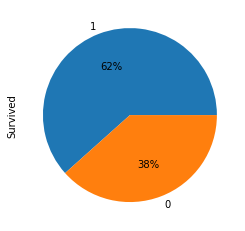

In [18]:
# Distribution of the labels in the training data
train_df.Survived.value_counts().plot(kind = 'pie', labels = ['1','0'], autopct='%.0f%%')

There is an imbalance when it comes to number of observations where the passenger survived/not survived. There are ways to battle it. But first let's not move into that, let´s make a quick and fast model to have as a baseline of accuracy.